<a href="https://colab.research.google.com/github/isemotoshota/Prog2kakushin/blob/main/work3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Turtle,OpenCVを実行するために以下を実行する

In [1]:
import numpy as np
import sys
import cv2
from google.colab.patches import cv2_imshow

以下はオセロ8*8マスのを遊ぶことができるものである
ただし、キーボード入力は縦と横それぞれ左上から0～7で入力するようになっている

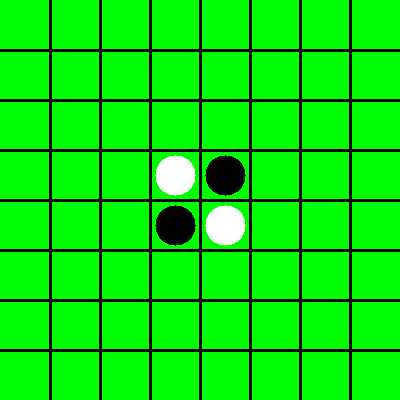

白のターン
縦：3
横：5
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 2. 0. 0. 0.]
 [0. 0. 0. 2. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


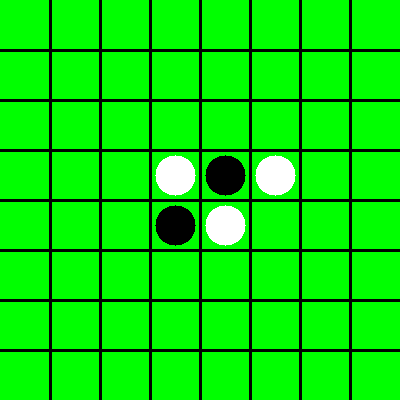

黒のターン
縦：3
横：2
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 2. 0. 0. 0. 0.]
 [0. 0. 0. 2. 2. 0. 0. 0.]
 [0. 0. 0. 2. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


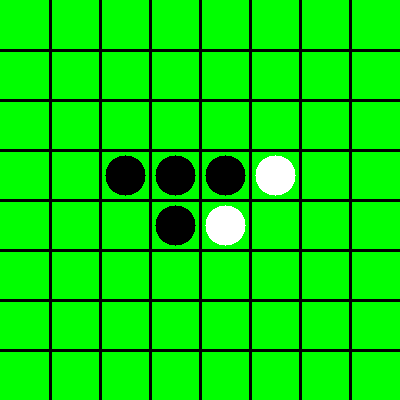

白のターン


KeyboardInterrupt: ignored

In [13]:
img = np.zeros((400,400,3),np.uint8)
target_color = (0,0,0)
change_color = (0,255,0)
h,w = img.shape[:2]
for s in range(h):
  for t in range(w):
    b,g,r = img[s,t]
    if (b,g,r) == target_color:
      img[s,t] = change_color
for i in range(7):
  n = (i+1)*50
  cv2.line(img,pt1=(n,0),pt2=(n,400),color=(0,0,0),thickness=2)
  cv2.line(img,pt1=(0,n),pt2=(400,n),color=(0,0,0),thickness=2)
n = 1
white = 0
black = 0
field = np.zeros((8,8,))
field[3][3] = 1
field[4][4] = 1
field[3][4] = 2
field[4][3] = 2
for p in range(8):
  for q in range(8):
    P = p*50+25
    Q = q*50+25
    if field[p][q] == 1:
      cv2.circle(img,center=(P,Q),radius=(20),color=(255,255,255),thickness=-1)
    elif field[p][q] == 2:
      cv2.circle(img,center=(P,Q),radius=(20),color=(0,0,0),thickness=-1)
cv2_imshow(img)
while True :
  num = 0
  if n%2 == 1 :
    turn = 1
    print('白のターン')
  else :
    turn = 2
    print('黒のターン')
  y = int(input('縦：'))
  x = int(input('横：'))
  if field[x][y] != 0:
    print('既に埋まっているマスです')
    continue
  elif 0 > x or 0 > y or 8 <= x or 8 <= y:
    print('範囲外です')
    continue
  if n%2 == 1 :
    field[x][y] = 1
  else :
    field[x][y] = 2
  while num < 8 :
    X = 7-x
    Y = 7-y
    #横の処理
    if num == 0:
      for ix in range(X):
        if turn == 1:
          if field[ix+x+1][y] == 1:
            for jx in range(ix):
              if field[jx+x+1][y] == 0:
                num += 1
                continue
              field[jx+x+1][y] = 1
            num += 1
            continue
        else :
          if field[ix+x+1][y] == 2:
            for jx in range(ix):
              if field[jx+x+1][y] == 0:
                num += 1
                continue
              field[jx+x+1][y] = 2
            num += 1
            continue
    elif num == 1:
      for ix in range(x-1):
        if turn == 1:
          if field[x-ix-1][y] == 1:
            for jx in range(ix):
              if field[x-jx-1][y] == 0:
                num += 1
                continue
              field[x-jx-1][y] = 1
            num += 1
            continue
        else :
          if field[x-ix-1][y] == 2:
            for jx in range(ix):
              if field[x-jx-1][y] == 0:
                num += 1
                continue
              field[x-jx-1][y] = 2
            num += 1
            continue
    #縦の処理
    elif num == 2:
      for iy in range(Y):
        if turn == 1:
          if field[x][iy+y+1] == 1:
            for jy in range(iy):
              if field[x][jy+y+1] == 0:
                num += 1
                continue
              field[x][jy+y+1] = 1
            num += 1
            continue
        else :
          if field[x][iy+y+1] == 2:
            for jx in range(iy):
              if field[x][jy+y+1] == 0:
                num += 1
                continue
              field[x][jy+y+1] = 2
            num += 1
            continue
    elif num == 3:
      for iy in range(y-1):
        if turn == 1:
          if field[x][y-iy-1] == 1:
            for jy in range(iy):
              if field[x][y-jy-1] == 0:
                num += 1
                continue
              field[x][y-jy-1] = 1
            num += 1
            continue
        else :
          if field[x][y-iy-1] ==2:
            for jy  in range(iy):
              if field[x][y-jy-1] == 0:
                num += 1
                continue
              field[x][y-iy-1] = 2
            num += 1
            continue
    #右下がりの斜めの処理
    elif num == 4:
      for ix in range(X):
        for iy in range(Y):
          if turn == 1:
            if field[ix+x+1][iy+y+1] == 1:
              if Y-X >= 0:
                for jx in range(ix):
                  if field[jx+x+1][jx+y+1] == 0:
                    num += 1
                    continue
                  field[jx+x+1][jx+y+1] = 1
                num += 1
                continue
              else :
                for jy in range(iy):
                  if field[jy+x+1][jy+y+1] == 0:
                    num += 1 
                    continue
                  field[jy+x+1][jy+y+1] = 1
                num += 1
                continue
          else:
            if field[ix+x+1][iy+y+1] == 2:
              if Y-X >= 0:
                for jx in range(ix):
                  if field[jx+x+1][jy+y+1] == 0:
                    num += 1
                    continue
                  field[jx+x+1][jx+y+1] = 2
                num += 1
                continue
              else :
                for jy in range(iy):
                  if field[jy+x+1][jy+y+1] == 0:
                    num += 1
                    continue
                  field[jy+x+1][jy+y+1] = 2
                num += 1
                continue
    elif num == 5:
      for ix in range(x-1):
        for iy in range(y-1):
          if turn == 1:
            if field[x-ix-1][y-iy-1] == 1:
              if (y-1)-(x-1) >= 0:
                for jx in range(ix):
                  if field[x-jx-1][y-jx-1] == 0:
                    num += 1
                    continue
                  field[x-jx-1][y-jx-1] = 1
                num += 1
                continue
              else:
                for jy in range(iy):
                  if field[x-jy-1][y-jy-1] == 0:
                    num += 1
                    continue
                  field[x-jy-1][y-jy-1] = 1
                num += 1
                continue
          else :
            if field[x-ix-1][y-iy-1] == 2:
              if (y-1)-(x-1) >= 0:
                for jx in range(ix):
                  if field[x-jx-1][y-jx-1] == 0:
                    num += 1
                    continue
                  field[x-jx-1][y-jx-1] = 2
                num += 1
                continue
              else :
                for jy in range(iy):
                  if field[x-jy-1][y-jy-1] == 0:
                    num += 1
                    continue
                  field[x-jy-1][y-jy-1] = 2
                num += 1
                continue
    #左下がりの斜めの処理
    elif num == 6:
      for ix in range(X):
        for iy in range(y-1):
          if turn == 1:
            if field[ix+x+1][y-iy-1] == 1:
              if (y-1)-X >= 0:
                for jx in range(ix):
                  field[jx+x+1][y-jx-1] = 1
                num += 1
                continue
              else :
                for jy in range(iy):
                  field[jy+x+1][y-jy-1] = 1
                num += 1
                continue
          else :
            if field[ix+x+1][y-iy-1] == 2:
              if (y-1)-X >= 0:
                for jx in range(ix):
                  field[jx+x+1][y-jx-1] = 2
                num += 1
                continue
              else :
                for jy in range(iy):
                  field[jy+x+1][y-jy-1] = 2
                num += 1
                continue
    elif num == 7:
      for ix in range(x-1):
        for iy in range(Y):
          if turn == 1:
            if field[x-ix-1][iy+y+1] == 1:
              if Y-(x-1) >= 0:
                for jx in range(ix):
                  field[x-jx-1][jx+y+1] = 1
                num += 1
                continue
              else :
                for jy in range(iy):
                  field[x-jy-1][jy+y+1] = 1
                num += 1
                continue
          else :
            if field[x-ix-1][iy+y+1] == 2:
              if (y-1)-X >= 0:
                for jx in range(ix):
                  field[x-jx-1][jx+y+1] = 2
                num += 1
                continue
              else :
                for jy in range(iy):
                  field[x-jy-1][jy+y+1]= 2
                num += 1
                continue
    num += 1
    result_w = 1 in field
    result_k = 2 in field
    if result_w or result_k == False:
      break
  for p in range(8):
    for q in range(8):
      P = p*50+25
      Q = q*50+25
      if field[p][q] == 1:
        white += 1
        cv2.circle(img,center=(P,Q),radius=(20),color=(255,255,255),thickness=-1)
      elif field[p][q] == 2:
        black += 1
        cv2.circle(img,center=(P,Q),radius=(20),color=(0,0,0),thickness=-1)
  print(field)
  n += 1
  cv2_imshow(img)
  result = 0 in field
  if result == False:
    print(f'白{white}個')
    print(f'黒{black}個')
    if white > black:
      print('白の勝ち！')
    elif white < black:
      print('黒の勝ち！')
    else :
      print('引き分け')
    break
